In [15]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np

from wavhandler import *
from utils import *
import multiprocessing
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
sn.set()

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

In [16]:
df_mosquitos = pd.read_pickle('./data/mosquitos.pkl')

# Creating dataframes that contain PSDs for each insect class

In [17]:
sz = 20000
df_an = make_df_parallel(df_mosquitos, setting='psd', insect_class='Anopheles', sample_size=sz).T
df_an['label'] = 'an'
df_ae = make_df_parallel(df_mosquitos, setting='psd',insect_class='Aedes', sample_size=sz).T
df_ae['label'] = 'ae'
df_cu = make_df_parallel(df_mosquitos, setting='psd',insect_class='Culex', sample_size=sz).T
df_cu['label'] = 'cu'

In [18]:
df_concat = pd.concat([df_ae, df_an, df_cu], axis=0, sort=False)
print(df_concat.shape)
df_concat.dropna(how='all', axis=1, inplace=True)
df_concat.dropna(how='any', axis=0, inplace=True)
print(df_concat.shape)
df_concat.head()
labelarray = df_concat.label.values
df_concat.drop('label', axis=1, inplace=True)
print(labelarray.shape)

(60000, 130)
(60000, 130)
(60000,)


### Example PSD

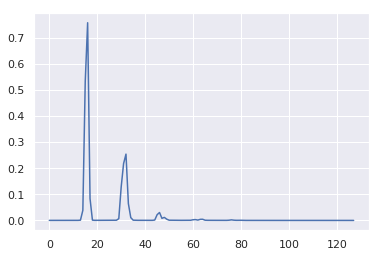

In [19]:
df_concat.iloc[9,:-1].plot()

# Loading the main dataframe created earlier to combine them both into one (merging on index)

In [20]:
df_mosquitos.drop(['names','pathlen','fnamelen','temp','humd','label2'], axis=1, inplace=True)
df_mosquitos = pd.read_pickle('./data/mosquitos.pkl')
df_mosquitos.set_index('fname', inplace=True)
print(df_mosquitos.shape)
df_mosquitos.tail(10)

(167725, 16)


,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,names,pathlen,fnamelen,temp,humd,label1,label2
fname,,,,,,,,,,,,,,,,
F170301_193157_020_G_050_T_25.9_H_56.0,0.032887,0.093844,0.001396,810.546875,1625.000000,2425.781250,0.040964,0.009014,0.010870,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_193314_029_G_050_T_25.9_H_56.0,0.122471,0.086202,0.002711,764.648438,1562.500000,2289.062500,0.031290,0.022187,0.009812,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_193417_033_G_050_T_25.9_H_56.0,0.127117,0.042620,0.000739,787.109375,1582.031250,2305.664062,0.031638,0.010802,0.007412,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_193421_034_G_050_T_25.9_H_56.0,0.038245,0.012146,0.000624,728.515625,1417.968750,2151.367188,0.038204,0.025826,0.006809,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_193636_042_G_050_T_25.9_H_56.5,0.111496,0.092593,0.001553,544.921875,1102.539062,1555.664062,0.049283,0.011957,0.010986,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.5,Aedes,Ae. albopictus
F170301_193915_054_G_050_T_25.9_H_56.0,0.066598,0.136234,0.004561,527.343750,1052.734375,1562.500000,0.047222,0.027829,0.023750,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_193916_055_G_050_T_25.9_H_56.0,0.113899,0.092764,0.032408,518.554688,1027.343750,1505.859375,0.048023,0.026141,0.020752,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_194005_064_G_050_T_25.9_H_56.0,0.082995,0.010639,0.001265,811.523438,1614.257812,2411.132812,0.044525,0.016939,0.012961,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.0,Aedes,Ae. albopictus
F170301_194043_070_G_050_T_25.9_H_56.5,0.096156,0.014383,0.001267,832.031250,1676.757812,2431.640625,0.036972,0.011066,0.007430,/home/yannis/data/insects/Potamitis/Wingbeats/...,11,9,25.9,56.5,Aedes,Ae. albopictus


In [21]:
df = pd.merge(df_mosquitos, df_concat, left_index=True, right_index=True)
df.drop(['label1','label2','names','pathlen','fnamelen','humd','temp'], axis=1, inplace=True)
df.to_pickle('./data/big_df.pkl')

In [22]:
#df.read_pickle('./data/big_df.pkl')
df.head()

,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,0,...,119,120,121,122,123,124,125,126,127,128
F161205_161630_020_G_050,0.171698,0.036077,0.001314,625.000000,1251.953125,1875.000000,0.034375,0.018331,0.013021,0.000028,...,9.969326e-08,9.920874e-08,9.889024e-08,9.847872e-08,9.817715e-08,9.794684e-08,9.776252e-08,9.762721e-08,9.754803e-08,4.876074e-08
F161205_161651_023_G_050,0.164296,0.036720,0.009883,633.789062,1263.671875,1903.320312,0.036210,0.021638,0.017701,0.000118,...,6.096907e-07,6.084780e-07,6.054565e-07,6.044300e-07,6.030367e-07,6.018491e-07,6.010413e-07,6.004233e-07,6.000575e-07,2.999675e-07
F161205_161704_024_G_050,0.142084,0.079277,0.009867,448.242188,903.320312,1358.398438,0.055556,0.027568,0.020848,0.000273,...,5.355285e-07,5.332311e-07,5.314475e-07,5.299480e-07,5.288205e-07,5.278115e-07,5.270145e-07,5.264745e-07,5.261456e-07,2.630175e-07
F161205_161820_029_G_050,0.061740,0.154021,0.012451,625.000000,1241.210938,1863.281250,0.039062,0.018489,0.013365,0.000118,...,8.570645e-07,8.624167e-07,8.513044e-07,8.489963e-07,8.454602e-07,8.431171e-07,8.410482e-07,8.396493e-07,8.387970e-07,4.192563e-07
F161205_162347_045_G_050,0.052670,0.165347,0.011363,684.570312,1370.117188,2056.640625,0.032097,0.016037,0.010921,0.000052,...,2.901378e-07,2.854040e-07,2.850186e-07,2.826532e-07,2.811257e-07,2.798741e-07,2.788877e-07,2.782103e-07,2.778028e-07,1.388328e-07


## SELECTING ONLY POWER AMPLITUDES

In [23]:
df = df_concat
cols = df.columns.tolist()
labels = labelarray
classes = np.unique(labelarray)
#df.label.value_counts()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
F170207_161055_022_G_050,0.000099,0.000095,0.000068,0.000327,0.000441,0.000471,0.000506,0.000449,0.000450,0.000281,...,5.375441e-07,5.379648e-07,5.349034e-07,5.316930e-07,5.303367e-07,5.287493e-07,5.276468e-07,5.268495e-07,5.263613e-07,2.631011e-07
F170208_170549_064_G_050,0.000177,0.000171,0.000628,0.004729,0.010010,0.009248,0.005937,0.004851,0.004925,0.005356,...,1.047942e-06,1.045207e-06,1.040634e-06,1.036970e-06,1.034315e-06,1.031793e-06,1.030040e-06,1.028721e-06,1.027937e-06,5.138381e-07
F170211_162711_030_G_050,0.000151,0.000147,0.000355,0.002339,0.002416,0.002082,0.002215,0.001497,0.001298,0.001348,...,4.074905e-07,4.042218e-07,4.043949e-07,4.038634e-07,4.017354e-07,4.011067e-07,4.003858e-07,3.999181e-07,3.996189e-07,1.997604e-07
F170210_210115_095_G_050,0.000520,0.000623,0.001652,0.008041,0.007861,0.004717,0.006280,0.007278,0.004571,0.007640,...,6.361077e-07,6.318555e-07,6.293880e-07,6.238914e-07,6.221874e-07,6.199506e-07,6.180565e-07,6.168262e-07,6.160856e-07,3.079179e-07
F170209_181725_156_G_050,0.000125,0.000151,0.000331,0.000569,0.000352,0.000232,0.000216,0.000142,0.000101,0.000086,...,6.844783e-07,6.815963e-07,6.791683e-07,6.770772e-07,6.753203e-07,6.738882e-07,6.727373e-07,6.719224e-07,6.714389e-07,3.356396e-07


In [24]:
df.index.shape

(60000,)

# Training a classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

X, y = shuffle(df.values, labelarray, random_state=3)
#del df

"""
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
ros.fit(X,y)
X, y = ros.fit_resample(X,y)
print('After undersampling: \n{}\n'.format(pd.DataFrame(y).iloc[:,0].value_counts()))
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

classifier = xgboost.XGBClassifier(n_estimators=650, learning_rate=0.2, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print("Name: %s, ac: %f" % ('XGBoost', ac))

Name: XGBoost, ac: 0.857750


## Feature importance

In [26]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                    index = df.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
3,0.029967
2,0.027811
17,0.017252
20,0.016880
1,0.016582
14,0.015913
12,0.014723
15,0.014203
19,0.013980
16,0.013682


### Saving the model

In [27]:
import pickle

pickle.dump(classifier, open("pima.pickle.dat", "wb"))
pd.Series(df.index).to_csv('pima_idx_used.csv')

# loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [56]:
pd.DataFrame(X).to_csv('./unsupervised/mosquitos_test.csv')

# Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
len(labels)

In [ ]:
# Making a dataframe of the confusion matrix to plot it
df_cm = pd.DataFrame(cm, index=[i for i in classes], 
                    columns=[i for i in classes])
plt.figure(figsize=(12,7))
sn.heatmap(df_cm, annot=True, fmt='g')

plt.show()

In [ ]:
sub = np.concatenate((X, y.reshape(-1,1)), axis=1)
sub = pd.DataFrame(sub)
sub.sort_values(by=sub.iloc[:,-1].name, inplace=True)

In [ ]:
sub.dropna(how='any', axis=0, inplace=True)


In [ ]:
from scipy.spatial.distance import pdist, squareform
D = squareform(pdist(sub.values[:,:-1], metric='euclidean'))
#‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, 
#‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘kulsinski’, 
#‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, 
#‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

plt.figure(figsize=(20,14))
plt.imshow(D)
plt.colorbar()

In [ ]:
def find_median_signal(D=None):
    a = np.nanmedian(D, axis=0)
    minval = np.argmin(a[np.nonzero(a)])
    return minval # index - argmin

In [ ]:
X = sub.values[:,:-1]

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

xx = X[100,:]
yy = X[13,:]

distance, path = fastdtw(xx, yy, dist=euclidean)
print(distance)

xx_idx = np.array([path[i][0] for i in range(len(path))])
yy_idx = np.array([path[i][1] for i in range(len(path))])

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(xx, c='r')
plt.plot(yy, c='y')
plt.legend(('xx','yy'))
plt.ylim(0,0.15)
plt.xlim(0,4000)


plt.subplot(2,2,2)
plt.plot(xx[xx_idx], c='b')
plt.plot(yy[yy_idx], c='c')
plt.legend(('xx_new','yy_new'))
plt.ylim(0,0.15)
plt.xlim(0,4000)


plt.subplot(2,2,3)
plt.plot(xx, c='r')
plt.plot(xx[xx_idx], c='b')
plt.legend(('xx','xx_new'))
plt.ylim(0,0.15)
plt.xlim(0,4000)

plt.subplot(2,2,4)
plt.plot(yy, c='y')
plt.plot(yy[yy_idx], c='c')
plt.legend(('yy','yy_new'))
plt.ylim(0,0.15)
plt.xlim(0,4000)


In [ ]:
median_signal_idx = find_median_signal(D=X.astype(float))
median_signal = X[median_signal_idx,:]
plt.plot(median_signal)

In [ ]:
#X.shape

D_dtw = np.zeros((600,600))

def warp_with_median_signal(xx, median_signal, distance=euclidean):
    _, path = fastdtw(xx, median_signal, dist=distance)
    
    idx = np.array([path[i][0] for i in range(len(path))])
    sig = xx[idx]
    
    return sig[:2500]

In [ ]:
sig = X[10,:]
plt.subplot(1,2,1)
plt.plot(warp_with_median_signal(sig, median_signal, distance=euclidean))
#plt.xlim(0,2500)

plt.subplot(1,2,2)
plt.plot(sig)
#plt.xlim(0,2500)

In [ ]:
from tqdm import tqdm

XX = []
for i in tqdm(range(X.shape[0])):
    XX.append(warp_with_median_signal(X[i,:], median_signal, distance=euclidean))

In [ ]:
XX = np.vstack(XX)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

X, y = shuffle(XX, y, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

classifier = xgboost.XGBClassifier(n_estimators=300, n_jobs=-1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print("Name: %s, ac: %f" % ('XGBoost', ac))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm